In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

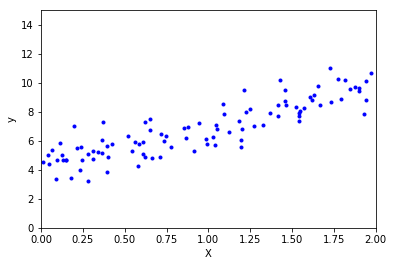

In [5]:
X = 2*np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [6]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

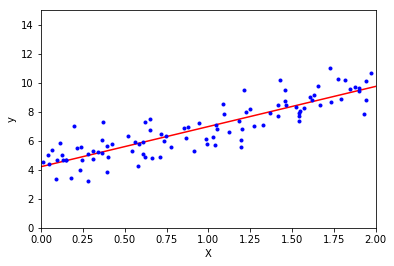

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#### Batch Gradient Descent

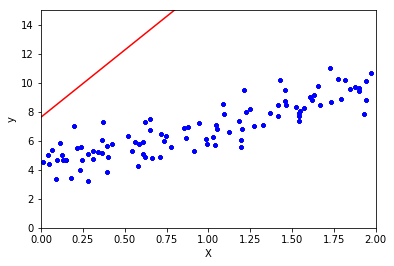

In [10]:
eta = 0.7
n_iterations = 10
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta*gradients
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)),X_new]
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, "r-")
    plt.plot(X, y, "b.")
    plt.axis([0, 2, 0, 15])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [11]:
theta

array([[-1454.40666882],
       [-1648.99643713]])

#### SGD

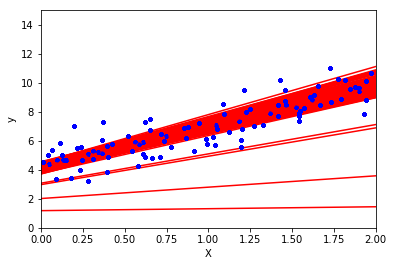

In [12]:
np.random.seed(42)
n_epochs = 50
t0,t1 = 5,50
def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in  range(m):
        rnd_idx = np.random.randint(m)
        xi = X_b[rnd_idx:rnd_idx+1]
        yi = y[rnd_idx:rnd_idx+1]
        
        grad = 2* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta =theta-eta*grad
        X_new = np.array([[0],[2]])
        X_new_b = np.c_[np.ones((2,1)),X_new]
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-")
        plt.plot(X, y, "b.")
        plt.axis([0, 2, 0, 15])
plt.xlabel('X')
plt.ylabel('y')
plt.show()
        
        
        


In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50,penalty=None,eta0 = 0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

/home/paraqum/anaconda3/envs/nila_ML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([4.23166744]), array([2.79099659]))

#### MGD

In [14]:
theta_path_mgd = []
n_itertions = 50
mini_batch_size = 20
np.random.seed(42)

theta = np.random.randn(2,1)
t0,t1 = 200,1000
def learning_schedule(t):
    return t0 /(t+t1)

t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled =y[shuffled_indices]
    
    for i in range(0,m,mini_batch_size):
        t+=1
        xi = X_b_shuffled[i:i+mini_batch_size]
        yi = y_shuffled[i:i+mini_batch_size]
        
        gradients = 2/mini_batch_size*xi.T.dot(xi.dot(theta)-yi)
        
        eta = learning_schedule(t)
        theta-= eta*gradients
        theta_path_mgd.append(theta)
        
    
    


In [18]:
theta



array([[4.11876962],
       [2.71062372]])

In [16]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

NameError: name 'theta_path_bgd' is not defined

In [20]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [21]:
m =100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+2+np.random.randn(m,1)


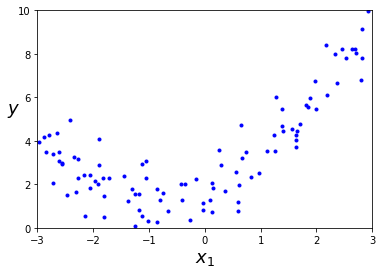

In [23]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_data_plot")
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [28]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

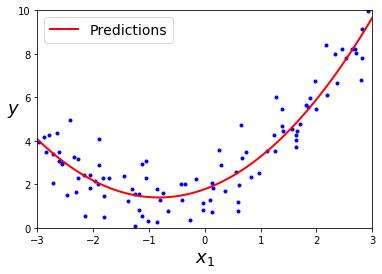

In [31]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()



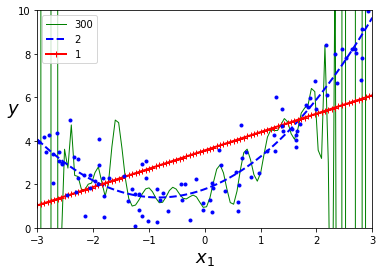

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style,width,degree in (('g-',1,300),('b--',2,2),('r-+',2,1)):
    polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([('poly_features',polybig_features),
                                     ('std_scaler',std_scaler),
                                     ('lin_reg',lin_reg)])
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new,y_newbig,style,label=str(degree),linewidth=width)
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("high_degree_polynomials_plot")
plt.show()


In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown


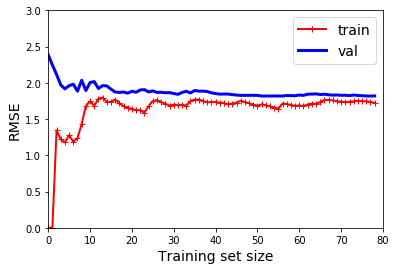

In [49]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()  

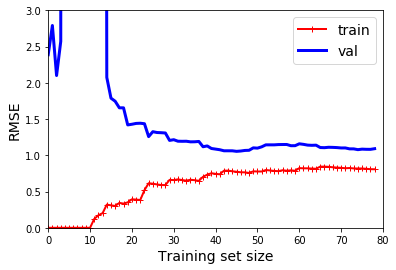

In [50]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()

# Regularized Models

In [69]:
from sklearn.linear_model import Ridge
np.random.seed(42)
m = 20
X = 3*np.random.rand(m,1)
y = 1+0.5*X+np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)

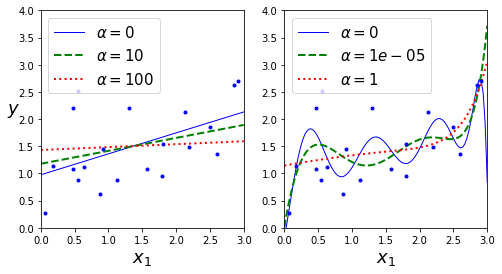

In [70]:
def plot_model(model_class,polynomial,alphas,**model_kwargs):
    for alpha,style in zip(alphas,('b-','g--','r:')):
        model = model_class(alpha,**model_kwargs) if alpha>0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
                ('std_scaler',StandardScaler()),
                ('regul_reg',model),
            ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha>0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()
        
    

In [72]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky',random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [73]:
sgd_reg = SGDRegressor(max_iter=50,tol=-np.infty,penalty='l2',random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

In [74]:
ridge_reg = Ridge(alpha=1,solver='sag',random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([[1.5507201]])

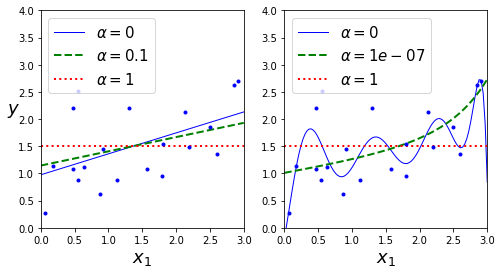

In [75]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

#save_fig("lasso_regression_plot")
plt.show()

In [76]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])


array([1.53788174])

In [77]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

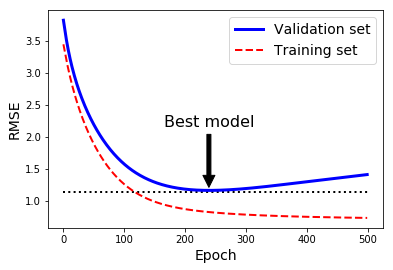

In [84]:
np.random.seed(42)
m = 100
X = 6*np.random.rand(m,1)-3
y = 2+X+0.5*X**2+np.random.randn(m,1)



X_train,X_val,y_train,y_val = train_test_split(X[:50],y[:50].ravel(),test_size=0.5,random_state=10)

poly_scaler = Pipeline([('poly_features',PolynomialFeatures(degree=90,include_bias=False)),
                       ('std_scaler',StandardScaler()),])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg  = SGDRegressor(max_iter=1,
                        tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate='constant',
                       random_state=42)
n_epochs = 500
train_errors,val_errors = [],[]

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train,y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
    
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
            xy=(best_epoch,best_val_rmse),
            xytext=(best_epoch,best_val_rmse+1),
            ha='center',
            arrowprops=dict(facecolor='black',shrink=0.05),
            fontsize=16,)
best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#save_fig("early_stopping_plot")
plt.show()